# First Jupyter notebook

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("default_of_credit_card_clients__courseware_version_1_21_19.xls")

In [3]:
df.shape

(30000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Verifying Basic Data Integrity

In [6]:
# examine the columns 

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# using the ID column to verify if the row (obs) are unique

df["ID"].nunique()

29687

In [10]:
# checking to see how many ID's are duplicated note the IDs are the row indices 

id_counts = df["ID"].value_counts()
id_counts.head()

369e565a-26a1    2
a9d910f4-fe9a    2
5f38afd8-e138    2
ff619017-560f    2
a3a5c0fc-fdd6    2
Name: ID, dtype: int64

In [11]:
# To display the number of grouped entries by running another value count

id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

# Creating a boolean mask to clean the data

In [12]:
dupe_mask = id_counts == 2
dupe_mask[:5]

369e565a-26a1    True
a9d910f4-fe9a    True
5f38afd8-e138    True
ff619017-560f    True
a3a5c0fc-fdd6    True
Name: ID, dtype: bool

In [13]:
id_counts.index[:5]

Index(['369e565a-26a1', 'a9d910f4-fe9a', '5f38afd8-e138', 'ff619017-560f',
       'a3a5c0fc-fdd6'],
      dtype='object')

In [15]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids[:5]

Index(['369e565a-26a1', 'a9d910f4-fe9a', '5f38afd8-e138', 'ff619017-560f',
       'a3a5c0fc-fdd6'],
      dtype='object')

In [17]:
# Convert dupe_ids to a list and display the length

dupe_ids = list(dupe_ids)

len(dupe_ids)

313

In [18]:
# verify the data in dupe_ids by displaying the first five entries using the following command 

dupe_ids[:5]

['369e565a-26a1',
 'a9d910f4-fe9a',
 '5f38afd8-e138',
 'ff619017-560f',
 'a3a5c0fc-fdd6']

In [19]:
# using the first three ids of dupe_ids we will examine the the data to see if anything is different between the duplicates
df.loc[df["ID"].isin(dupe_ids[:3]),:].head(10)

# Looks like the second dup are invaild all columns except for the first are just zeros

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7070,5f38afd8-e138,80000,1,1,1,40,0,0,2,2,...,30787,34513,34995,3600,1200,0,4246,1200,1500,1
7170,5f38afd8-e138,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21559,369e565a-26a1,20000,2,3,0,23,0,0,0,0,...,18290,18665,19077,2000,1388,1115,490,531,400,0
21659,369e565a-26a1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28250,a9d910f4-fe9a,140000,2,2,1,34,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
28350,a9d910f4-fe9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# We remove the the rows with just all zeros by first creating a boolean matrix of the same size as the entire DataFrame
df_zero_mask = df == 0

In [22]:
# Next step is to create a boolean series "feature_zero_mask" that ids every row where all the elements starting from the second
#column are 0

feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [23]:
#checking how many rows where found 

sum(feature_zero_mask)

315

In [24]:
# Clean the DataFrame by eliminating the rows with all zeros. We make a copy of the existing dataframe 

df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [26]:
df_clean_1.shape

(29685, 25)

In [27]:
# obtaining the number of unique IDs
df_clean_1["ID"].nunique()

29685

In [28]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [29]:
# taking a closer look at the "PAY_1" columns to see why the type is object and not int

df_clean_1["PAY_1"].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [30]:
# Looking at the value_counts for this columns

df_clean_1["PAY_1"].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [31]:
# Since this columns contains string values "Not available" we will remove

valid_pay_1_mask = df_clean_1["PAY_1"] != "Not available"
valid_pay_1_mask[:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [32]:
# checking how many valid rows (rows without "Not available") by calculating the sum of the mask
sum(valid_pay_1_mask)

26664

In [33]:
# creating a new dataframe without the rows that have "Not available"

df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

#checking the new size of the dataframe

df_clean_2.shape

(26664, 25)

In [34]:
# Checking column "PAY_1" again to see if the "Not available" values are gone

df_clean_2["PAY_1"].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [35]:
# Casting the "PAY_1" column to be of type int64

df_clean_2["PAY_1"] = df_clean_2["PAY_1"].astype("int64")
df_clean_2[["PAY_1","PAY_2"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


# Exploring the Credit Limit and Demographic Features

In [36]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D23036B80>,
      dtype=object)

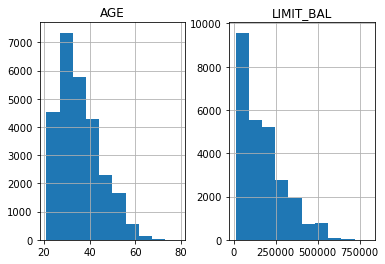

In [37]:
# creating a histogram of credit limit and age

df_clean_2[["LIMIT_BAL","AGE"]].hist()

In [38]:
# obtaining summary stats on credit limit and age

df_clean_2[["LIMIT_BAL","AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [39]:
# For categorical features looking at value counts can be helpful

df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [40]:
# because the following levels 0,5,6 are unknown we will group them with other level 4
df_clean_2["EDUCATION"].replace(to_replace=[0,5,6],value=4,inplace=True)
df_clean_2["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [41]:
# obtaining the value count on the marriage feature

df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [42]:
# similar case that was encountered with the Education feature the value 0 is unknown so will be grouped level 3 others

df_clean_2["MARRIAGE"].replace(to_replace=0,value=3,inplace=True)
df_clean_2["MARRIAGE"].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Deep Dive Categorical Features

Text(0.5, 0, 'Education level: ordinal encoding')

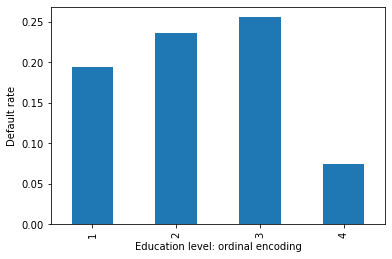

In [44]:
# looking at the different levels of the categorical variable education to determine if ordinal encoding will work well with a
# linear model


df_clean_2.groupby("EDUCATION").agg({"default payment next month":"mean"}).plot.bar(legend=False)
plt.ylabel("Default rate")
plt.xlabel("Education level: ordinal encoding")

In [45]:
#This looks like a straight line would not work. In case a non-linear feature has an effect like this it is better to user a 
# more complex algorithm such decision tree or random forest. Or if a simpler and more interpretable linear model such as logistic
# regression is desired we could avoid ordinal encoding and use a different way of encoding categorial variables. One way is
# one hot encoding

# Implementing One hot encoding(OHE) for a Categorical feature

In [46]:
# reverse engineer the education feature in the dataset to obtain the text labels that represent the different education levels
# then use pandas to create an OHE

#creating an empty column 
df_clean_2["EDUCATION_CAT"] = "none"
#examine the first few rows of the DataFrame Education education_cat
df_clean_2[["EDUCATION","EDUCATION_CAT"]].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [47]:
# creating e dictionary that we will use for our mapping 

cat_mapping ={1:"graduate school",2:"university",3:"high school",4:"others"}

# apply the mapping to original education column using .map then assign to the education_cat

df_clean_2["EDUCATION_CAT"] = df_clean_2["EDUCATION"].map(cat_mapping)
df_clean_2[["EDUCATION","EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [48]:
# Now creating the OHE using pandas

edu_ohe = pd.get_dummies(df_clean_2["EDUCATION_CAT"])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [49]:
#Concatenating the OHE dataframe to the original dataframe

df_with_ohe = pd.concat([df_clean_2,edu_ohe],axis=1)

df_with_ohe[["EDUCATION_CAT","graduate school","high school","university","others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [50]:
# The new dataframe looks good it's time to save 
df_with_ohe.to_csv("chapter_1_cleaned_data.csv",index = False)

# Exploring the Financial History Features in the Dataset

In [51]:
# getting used to loading a dataset from a csv file 

df = pd.read_csv("chapter_1_cleaned_data.csv")

In [52]:
#checking the loaded dataframe

df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [53]:
df.shape

(26664, 30)

In [54]:
# Looking at the financial history features

pay_feats = ["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [55]:
# Looking at the value_counts of PAY_1 sorted by values we are counting

df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

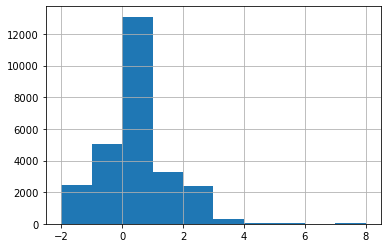

In [56]:
# histogram of PAY_1 feature

df[pay_feats[0]].hist()

In [58]:
import numpy as np
# creating an array of custom bin edges 

pay_1_bins = np.array(range(-2,10)) -0.5
print(pay_1_bins)

[-2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


Text(0, 0.5, 'Number of accounts')

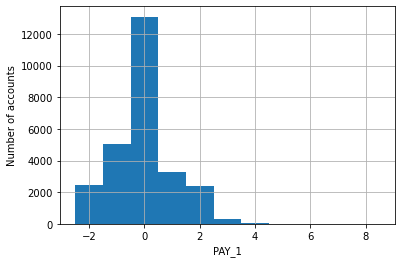

In [59]:
# creating the histogram for PAY_1

df[pay_feats[0]].hist(bins = pay_1_bins)
plt.xlabel("PAY_1")
plt.ylabel("Number of accounts")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D261F6760>,
      dtype=object)

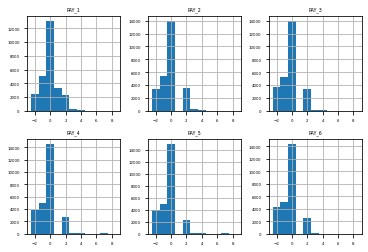

In [63]:
import matplotlib as mpl
#plotting the histograms for each of the payment features

mpl.rcParams["font.size"] = 4
df[pay_feats].hist(bins=pay_1_bins,layout=(2,3))

In [64]:
# looking at accounts with a 2 month delay in August and see what the payment status was in July 

df.loc[df["PAY_2"]==2,["PAY_2","PAY_3"]].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
